# About the project

Google Trends give us an estimate of search volume. Let's explore if search popularity relates to cryptocurrency prices. For this project, I will investigate whether there are related patterns between Google Search Trend and the price of Bitcoin - the most famous cryptocurrency.

Data Sources: <br>
<ul>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Price</a> </li>
</ul>

Regarding the investigation of BTC Search and Price, I download the data for 6-year period, particularly from 01-10-2017 to 30-09-2023.

# Import Statements

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

In [117]:
df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

# Data Exploration

### Explore Google Search Trend DataFrame

In [118]:
df_btc_search.shape

(72, 2)

In [119]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2017-10,27
1,2017-11,57
2,2017-12,100
3,2018-01,77
4,2018-02,67


In [46]:
print(f'Largest value for Bitcoin(BTC) in Web Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')
print(f'Smallest value for Bitcoin(BTC) in Web Search: {df_btc_search.BTC_NEWS_SEARCH.min()}')

Largest value for Bitcoin(BTC) in Web Search: 100
Smallest value for Bitcoin(BTC) in Web Search: 13


### Comments

The dataframe for BTC Search Trends has 72 rows, each row representing a month in 6 successive years and 2 columns, namely 'MONTH'showing the time recording data and 'BTC_NEWS_SEARCH' showing the news search popularity of Bitcoin during that time. 

In this dataframe, the largest value for Bitcoin(BTC) in Web Search is 100 while the smallest value for Bitcoin(BTC) in Web Search is 13. In terms of interpretation, these figures represent search interest relative to the highest value for the examined time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. 

<img src="google_trends.png">

### Explore BTC Price DataFrame

In [54]:
df_btc_price.shape

(2191, 3)

In [57]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2017-10-01,4403.740234,1208210048
1,2017-10-02,4409.319824,1431730048
2,2017-10-03,4317.479980,1288019968
3,2017-10-04,4229.359863,1116770048
4,2017-10-05,4328.410156,1161769984


In [55]:
df_btc_price.describe()

,CLOSE,VOLUME
count,2191.000000,2.191000e+03
mean,20633.279165,2.468038e+10
std,15874.673547,1.898964e+10
min,3236.761719,9.069280e+08
25%,8042.865478,1.080673e+10
50%,13950.300781,2.169090e+10
75%,29795.547851,3.362929e+10
max,67566.828125,3.509679e+11


In [59]:
df_btc_price[df_btc_price.CLOSE == df_btc_price.CLOSE.min()]

,DATE,CLOSE,VOLUME
440,2018-12-15,3236.761719,3551763561


In [61]:
df_btc_price[df_btc_price.CLOSE == df_btc_price.CLOSE.max()]

,DATE,CLOSE,VOLUME
1499,2021-11-08,67566.828125,41125608330


### Comments

The dataframe for BTC Price has 2191 rows, each row representing a day in 6 successive years and 3 columns, namely 'DATE' showing the time recording data, 'CLOSE' for close price of BTC and 'VOLUME' for the daily BTC trading volume.

From preliminary descriptive statistics, we can discover an enormous change in BTC price. While the lowest price during this 6-year period was only 3236.8 USD, the highest price reached 67566.8 USD. A closer look at the data shows that the lowest BTC price was in mid December 2018 and the price has increased over 20-fold in just under 3 years.

Another thing to notice is that while the df_btc_price dataframe has daily data, the df_btc_search has monthly data. This means that later we need to convert them into the same periodicity for further analysis.

# Data Cleaning

### Check for Missing Values

In [83]:
print(f"Missing values for BTC Search?: {df_btc_search.isna().values.any()}")
print(f"Missing values for BTC Price?: {df_btc_price.isna().values.any()}")

Missing values for BTC Search?: False
Missing values for BTC Price?: False


In [84]:
print(f"Duplicated values for BTC Search?: {df_btc_search.duplicated().values.any()}")
print(f"Duplicated values for BTC Price?: {df_btc_price.duplicated().values.any()}")

Duplicated values for BTC Search?: False
Duplicated values for BTC Price?: False


In [94]:
print(f'Check if there are any missing values in specific columns of df_btc_search?:\n{df_btc_search.isna().any()}\n')
print(f'Check if there are any missing values in specific columns of df_btc_price?:\n{df_btc_price.isna().any()}')

Check if there are any missing values in specific columns of df_btc_search?:
MONTH              False
BTC_NEWS_SEARCH    False
dtype: bool

Check if there are any missing values in specific columns of df_btc_price?:
DATE      False
CLOSE     False
VOLUME    False
dtype: bool


### Comments

Having checked, it is confirmed that there is neither missing values nor duplicated values in both dataframes. We even go further and check if there is any missing values in a particular column and eventually the answer is No. 

This means there is no need for the tasks of handling missing or duplicated values.

### Convert Strings to DateTime Objects

In [104]:
print(f'Check the data type of entries in column df_btc_search.MONTH: {type(df_btc_search.MONTH[0])}')
print(f'Check the data type of entries in column df_btc_price.DATE: {type(df_btc_price.DATE[0])}')

Check the data type of entries in column df_btc_search.MONTH: <class 'str'>
Check the data type of entries in column df_btc_price.DATE: <class 'str'>


In [105]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

In [106]:
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

### Comments

Checking the data types of the entries in the DataFrames' MONTH or DATE columns, we found that they are in string type. Therefore, they are converted into Datetime objects for suitable exploitation in further analysis.

### Converting from Daily to Monthly Data

In [107]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

### Comments

Since our Bitcoin price is daily data but our Bitcoin Search Popularity is monthly data, we need to make the datetime in 2 dataframes comparable.Therefore, we convert our daily data into monthly data, using the .resample() function. After resampling, we choose the last available price of the month - the price at month-end.

# Data Visualisation

### Bitcoin (BTC) Price v.s. Search Volume

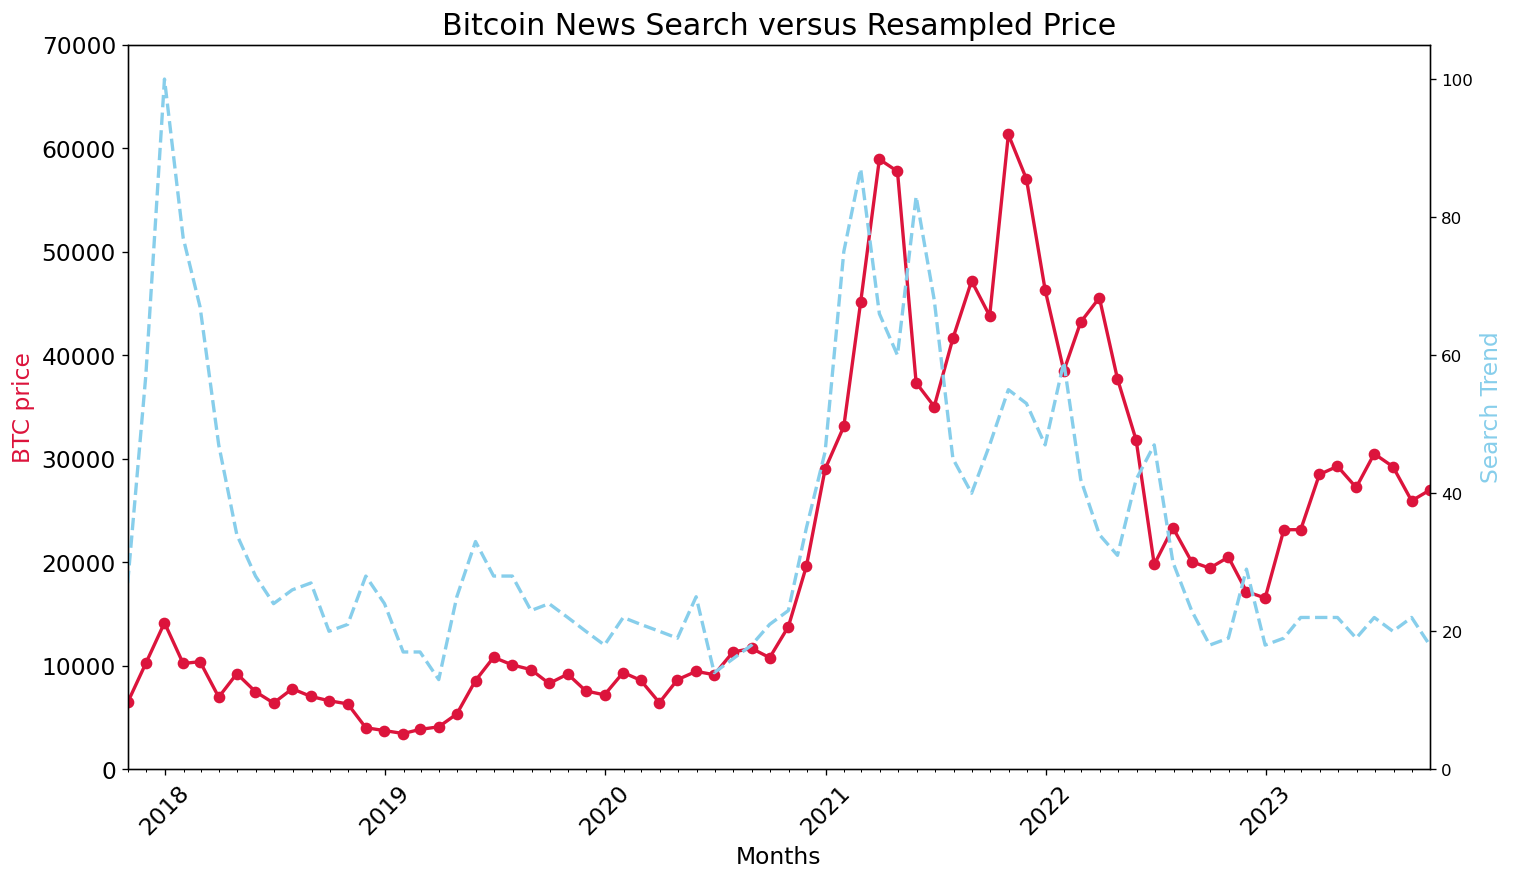

In [115]:
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

plt.figure(figsize=[14, 8], dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Bitcoin News Search versus Resampled Price', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_btc_monthly.DATE, df_btc_monthly.CLOSE, color="crimson", linewidth=2, marker='o')
ax2.plot(df_btc_monthly.DATE, df_btc_search.BTC_NEWS_SEARCH, color="skyblue", linewidth=2, linestyle = '--')
ax1.set_xlim([df_btc_monthly.DATE.min(), df_btc_monthly.DATE.max()])

ax1.set_ylim(0, 70000)
ax2.set_ylim(0, 105)

ax1.set_xlabel('Months', fontsize=14)
ax1.set_ylabel('BTC price', color="crimson", fontsize=14)
ax2.set_ylabel('Search Trend', color="skyblue", fontsize=14)

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())

plt.show()

### Comments

As can be seen, the movements of BTC price are clearly associated with movements BTC Search Trend. It seems that everyone was talking about Bitcoin in late 2017/early 2018 so search volumes were at a record high! However, after that, the Google search interest for BTC quickly plunged. Similarly,  Bitcoin price spent most of 2018 in a downtrend, falling throughout the year, following a brief surge to start the year. Both BTC price and Google Search Trend were at low levels during 2019 and early 2020, despite some small associated fluctations. 


The cryptocurrency climbed to start the year 2021, peaking around $60,000 in April, accompanied by a huge increase interest in BTC Search during this time. After a fall in both BTC price and search by mid-2021, both figures rise again by the end of 2021, though this time BTC price reached its new peak but BTC search number only increased to over 50.

After the all-time high in November 2021, BTC price dropped gradually to January 2023 and then slightly recovered from that onwards. It is clear that BTC search trends moved very closely with the movement of BTC Prices, both in up and down.